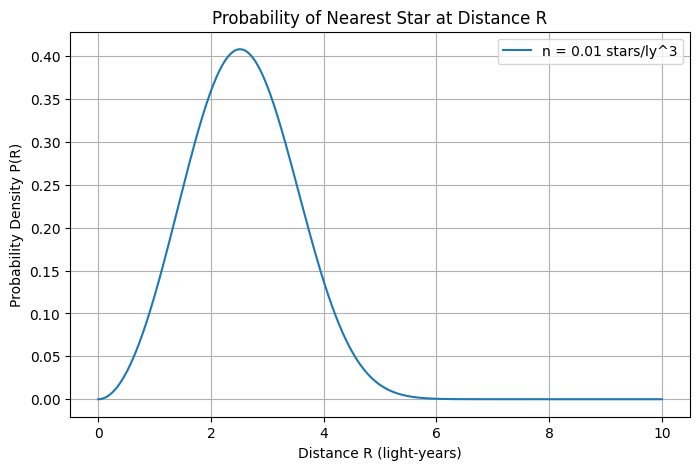

<Figure size 640x480 with 0 Axes>

In [1]:
#task 1
import numpy as np
import matplotlib.pyplot as plt

def nearest_star_probability(R, n):
    """Compute the probability density function of the nearest star at distance R."""
    return 4 * np.pi * n * R**2 * np.exp(- (4/3) * np.pi * n * R**3)

#define star density
n = 0.01  

R_values = np.linspace(0, 10, 1000)
P_values = nearest_star_probability(R_values, n)

plt.figure(figsize=(8, 5))
plt.plot(R_values, P_values, label=f"n = {n} stars/ly^3")
plt.xlabel("Distance R (light-years)")
plt.ylabel("Probability Density P(R)")
plt.title("Probability of Nearest Star at Distance R")
plt.legend()
plt.grid()
plt.show()
plt.savefig("nearest_star_probability.png", dpi=300, bbox_inches='tight')


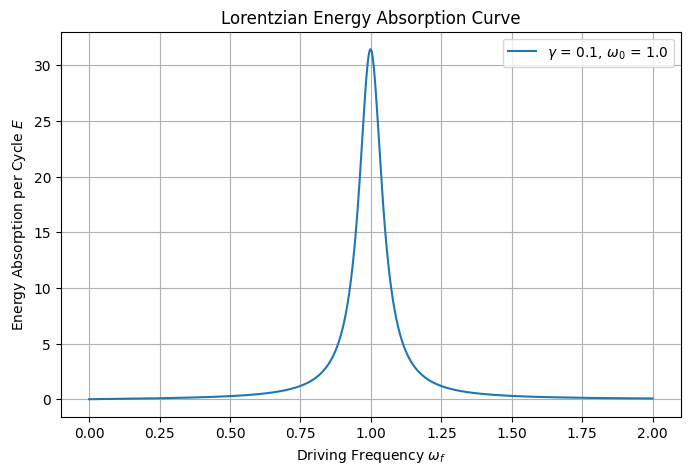

In [2]:
#task 2 
import numpy as np
import matplotlib.pyplot as plt

def lorentzian_energy_absorption(omega_f, omega_0, gamma, F):
    """Compute the energy absorption per cycle as a Lorentzian function."""
    return (F * np.pi * gamma * omega_f) / ((omega_0**2 - omega_f**2)**2 + gamma**2 * omega_f**2)

omega_0 = 1.0  
gamma = 0.1  
F = 1.0  

omega_f_values = np.linspace(0, 2, 1000)
E_values = lorentzian_energy_absorption(omega_f_values, omega_0, gamma, F)


plt.figure(figsize=(8, 5))
plt.plot(omega_f_values, E_values, label=f"$\gamma$ = {gamma}, $\omega_0$ = {omega_0}")
plt.xlabel("Driving Frequency $\omega_f$")
plt.ylabel("Energy Absorption per Cycle $E$")
plt.title("Lorentzian Energy Absorption Curve")
plt.legend()
plt.grid()
plt.savefig("lorentzian_energy_absorption.png", dpi=300, bbox_inches='tight')
plt.show()


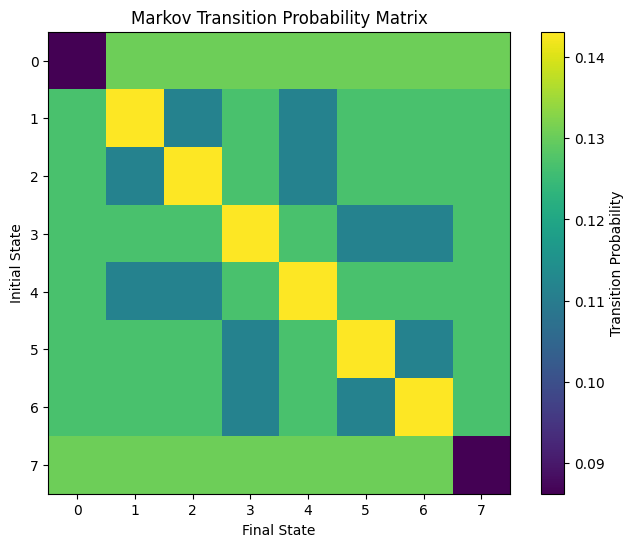

Transition Probability Matrix:
[[0.086 0.131 0.131 0.131 0.131 0.131 0.131 0.131]
 [0.127 0.143 0.111 0.127 0.111 0.127 0.127 0.127]
 [0.127 0.111 0.143 0.127 0.111 0.127 0.127 0.127]
 [0.127 0.127 0.127 0.143 0.127 0.111 0.111 0.127]
 [0.127 0.111 0.111 0.127 0.143 0.127 0.127 0.127]
 [0.127 0.127 0.127 0.111 0.127 0.143 0.111 0.127]
 [0.127 0.127 0.127 0.111 0.127 0.111 0.143 0.127]
 [0.131 0.131 0.131 0.131 0.131 0.131 0.131 0.086]]


In [3]:
#task 3 p1

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm

#Pauli matrices
Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)

#spin operators
def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)

#hamiltonian, periodic boundary conditions
J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))

#eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(H)

#transition rates 
transition_rates = np.abs(H) ** 2

#normalize to form a Markov transition matrix
row_sums = transition_rates.sum(axis=1, keepdims=True)
transition_matrix = transition_rates / row_sums


plt.figure(figsize=(8, 6))
plt.imshow(transition_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.xlabel("Final State")
plt.ylabel("Initial State")
plt.title("Markov Transition Probability Matrix")
plt.savefig("markov_transition_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


np.set_printoptions(precision=3, suppress=True)
print("Transition Probability Matrix:")
print(transition_matrix)


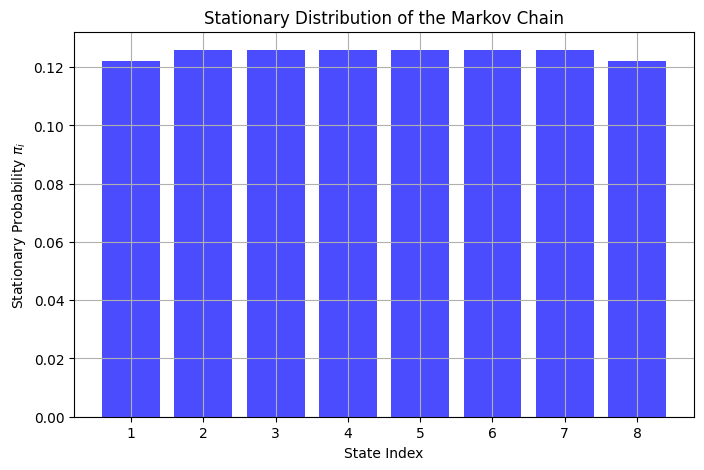

Stationary Distribution π:
[0.122 0.126 0.126 0.126 0.126 0.126 0.126 0.122]


In [4]:
#task3 p2
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm

Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)


def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)

J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))


eigenvalues, eigenvectors = eigh(H)

transition_rates = np.abs(H) ** 2

#normalize to form a markov transition matrix
row_sums = transition_rates.sum(axis=1, keepdims=True)
transition_matrix = transition_rates / row_sums

#stationary distribution pi
k = transition_matrix.shape[0]
A = transition_matrix.T - np.eye(k)
A[-1, :] = np.ones(k)  # Constraint for sum(π) = 1
b = np.zeros(k)
b[-1] = 1

pi = np.linalg.solve(A, b)

plt.figure(figsize=(8, 5))
plt.bar(range(1, k+1), pi, color='b', alpha=0.7)
plt.xlabel("State Index")
plt.ylabel("Stationary Probability $\pi_i$")
plt.title("Stationary Distribution of the Markov Chain")
plt.grid()
plt.savefig("stationary_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


np.set_printoptions(precision=3, suppress=True)
print("Stationary Distribution π:")
print(pi)


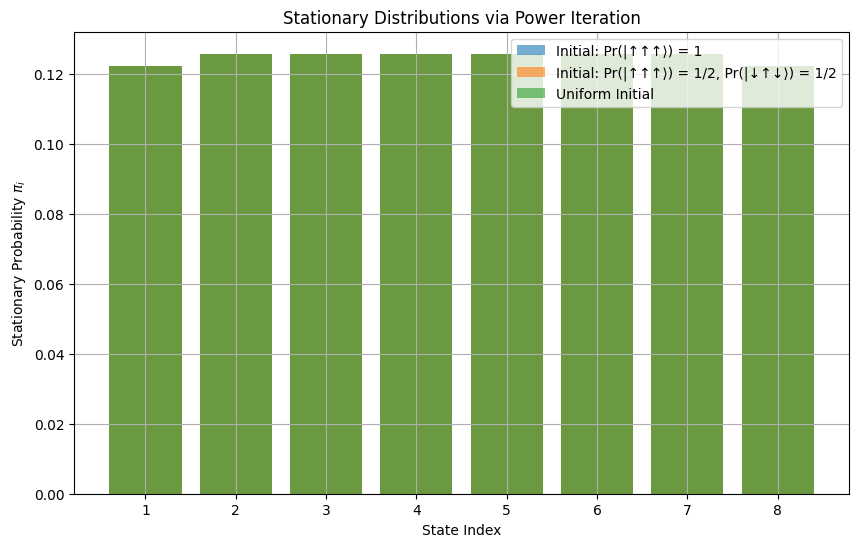

Stationary Distribution for Initial: Pr(|↑↑↑⟩) = 1:
[0.122 0.126 0.126 0.126 0.126 0.126 0.126 0.122]
Stationary Distribution for Initial: Pr(|↑↑↑⟩) = 1/2, Pr(|↓↑↓⟩) = 1/2:
[0.122 0.126 0.126 0.126 0.126 0.126 0.126 0.122]
Stationary Distribution for Uniform Initial:
[0.122 0.126 0.126 0.126 0.126 0.126 0.126 0.122]


In [5]:
#Task3 P3 

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm

Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)


def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)


J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))


eigenvalues, eigenvectors = eigh(H) 

transition_rates = np.abs(H) ** 2

row_sums = transition_rates.sum(axis=1, keepdims=True)
transition_matrix = transition_rates / row_sums


def power_iteration(P, pi0, tol=1e-6, max_iter=1000):
    pi = pi0
    for _ in range(max_iter):
        pi_next = pi @ P
        if np.linalg.norm(pi_next - pi) < tol:
            break
        pi = pi_next
    return pi


pi_initials = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),  # Pr(|↑↑↑⟩) = 1
    np.array([0.5, 0, 0, 0, 0, 0.5, 0, 0]),  # Pr(|↑↑↑⟩) = 1/2, Pr(|↓↑↓⟩) = 1/2
    np.ones(8) / 8  # Uniform distribution
]


stationary_distributions = [power_iteration(transition_matrix, pi0) for pi0 in pi_initials]


plt.figure(figsize=(10, 6))
labels = ["Initial: Pr(|↑↑↑⟩) = 1", "Initial: Pr(|↑↑↑⟩) = 1/2, Pr(|↓↑↓⟩) = 1/2", "Uniform Initial"]
for i, pi in enumerate(stationary_distributions):
    plt.bar(range(1, 9), pi, alpha=0.6, label=labels[i])

plt.xlabel("State Index")
plt.ylabel("Stationary Probability $\pi_i$")
plt.title("Stationary Distributions via Power Iteration")
plt.legend()
plt.grid()
plt.savefig("power_iteration_stationary_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

np.set_printoptions(precision=3, suppress=True)
for i, pi in enumerate(stationary_distributions):
    print(f"Stationary Distribution for {labels[i]}:")
    print(pi)
#maybe I need to make three separate plots since they are all initial guesses for the stationary distribution

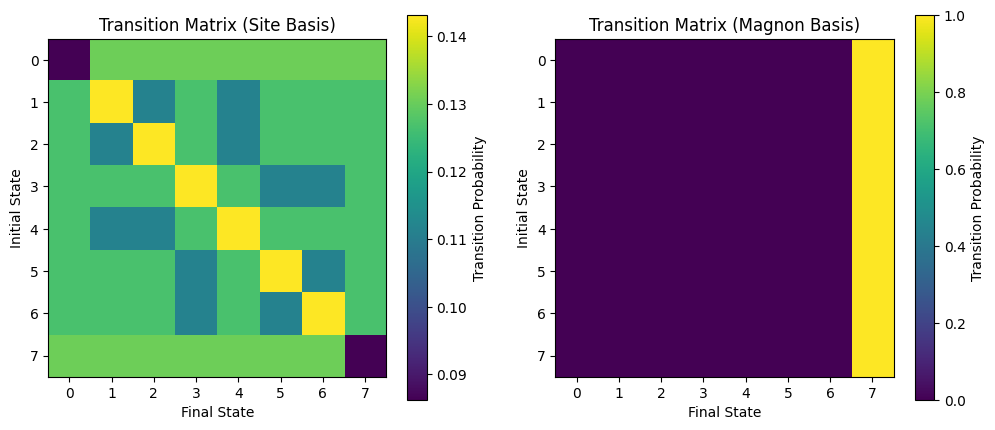

Transition Matrix (Site Basis):
[[0.086 0.131 0.131 0.131 0.131 0.131 0.131 0.131]
 [0.127 0.143 0.111 0.127 0.111 0.127 0.127 0.127]
 [0.127 0.111 0.143 0.127 0.111 0.127 0.127 0.127]
 [0.127 0.127 0.127 0.143 0.127 0.111 0.111 0.127]
 [0.127 0.111 0.111 0.127 0.143 0.127 0.127 0.127]
 [0.127 0.127 0.127 0.111 0.127 0.143 0.111 0.127]
 [0.127 0.127 0.127 0.111 0.127 0.111 0.143 0.127]
 [0.131 0.131 0.131 0.131 0.131 0.131 0.131 0.086]]

Transition Matrix (Magnon Basis):
[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
#Task 3 P4 

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm


Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)

def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)


J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))


eigenvalues, eigenvectors = eigh(H)

transition_rates = np.abs(H) ** 2

row_sums = transition_rates.sum(axis=1, keepdims=True)
transition_matrix_site = transition_rates / row_sums

kB = 1.0  
T = 1.0  

def boltzmann_transition_matrix(energies, T):
    P = np.exp(-np.subtract.outer(energies, energies) / (kB * T))
    P /= P.sum(axis=1, keepdims=True)  #normalizes rows
    return P

transition_matrix_magnon = boltzmann_transition_matrix(eigenvalues, T)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(transition_matrix_site, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.title("Transition Matrix (Site Basis)")
plt.xlabel("Final State")
plt.ylabel("Initial State")

plt.subplot(1, 2, 2)
plt.imshow(transition_matrix_magnon, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Transition Probability')
plt.title("Transition Matrix (Magnon Basis)")
plt.xlabel("Final State")
plt.ylabel("Initial State")

plt.savefig("comparison_transition_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

np.set_printoptions(precision=3, suppress=True)
print("Transition Matrix (Site Basis):")
print(transition_matrix_site)
print("\nTransition Matrix (Magnon Basis):")
print(transition_matrix_magnon)


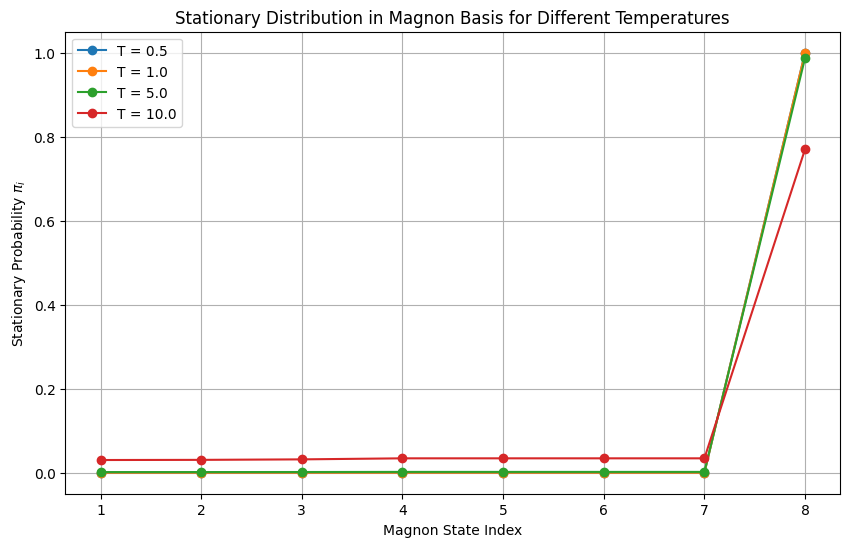

Stationary Distribution in Magnon Basis for T = 0.5:
[0. 0. 0. 0. 0. 0. 0. 1.]
Stationary Distribution in Magnon Basis for T = 1.0:
[0. 0. 0. 0. 0. 0. 0. 1.]
Stationary Distribution in Magnon Basis for T = 5.0:
[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.987]
Stationary Distribution in Magnon Basis for T = 10.0:
[0.03  0.031 0.032 0.034 0.034 0.034 0.034 0.77 ]


In [7]:
#task4 problem 5 

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm


Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)


def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)


J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))


eigenvalues, eigenvectors = eigh(H)


kB = 1.0  

def boltzmann_transition_matrix(energies, T):
    P = np.exp(-np.subtract.outer(energies, energies) / (kB * T))
    P /= P.sum(axis=1, keepdims=True)  
    return P

#solve for stationary distribution 

def stationary_distribution(P):
    k = P.shape[0]
    A = P.T - np.eye(k)
    A[-1, :] = np.ones(k)  
    b = np.zeros(k)
    b[-1] = 1
    return np.linalg.solve(A, b)


temperatures = [0.5, 1.0, 5.0, 10.0]
stationary_distributions = []

for T in temperatures:
    P_magnon = boltzmann_transition_matrix(eigenvalues, T)
    pi_magnon = stationary_distribution(P_magnon)
    stationary_distributions.append(pi_magnon)


plt.figure(figsize=(10, 6))
for i, T in enumerate(temperatures):
    plt.plot(range(1, len(eigenvalues) + 1), stationary_distributions[i], marker='o', label=f'T = {T}')

plt.xlabel("Magnon State Index")
plt.ylabel("Stationary Probability $\pi_i$")
plt.title("Stationary Distribution in Magnon Basis for Different Temperatures")
plt.legend()
plt.grid()
plt.savefig("stationary_distribution_magnon.png", dpi=300, bbox_inches='tight')
plt.show()


np.set_printoptions(precision=3, suppress=True)
for i, T in enumerate(temperatures):
    print(f"Stationary Distribution in Magnon Basis for T = {T}:")
    print(stationary_distributions[i])


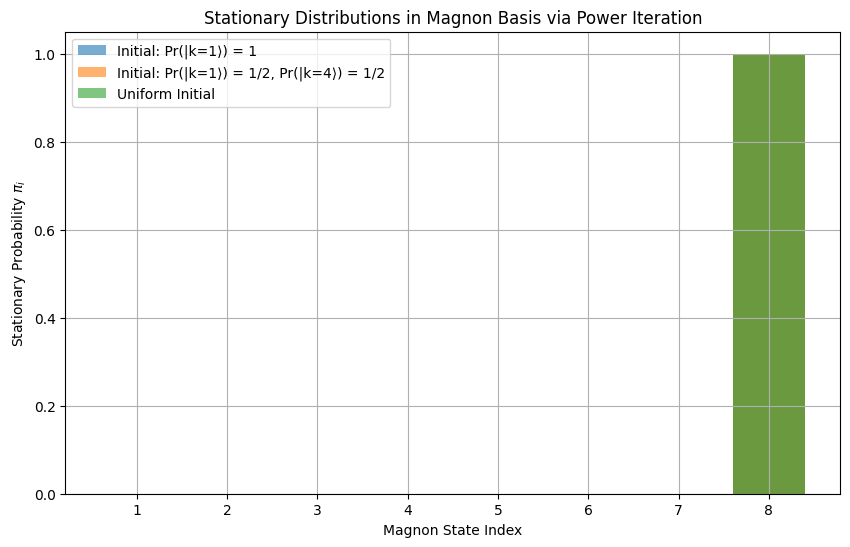

Stationary Distribution for Initial: Pr(|k=1⟩) = 1:
[0. 0. 0. 0. 0. 0. 0. 1.]
Stationary Distribution for Initial: Pr(|k=1⟩) = 1/2, Pr(|k=4⟩) = 1/2:
[0. 0. 0. 0. 0. 0. 0. 1.]
Stationary Distribution for Uniform Initial:
[0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
#task4p6 

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm


Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)


def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)


J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))


eigenvalues, eigenvectors = eigh(H)


kB = 1.0  
T = 1.0  

def boltzmann_transition_matrix(energies, T):
    P = np.exp(-np.subtract.outer(energies, energies) / (kB * T))
    P /= P.sum(axis=1, keepdims=True)  
    return P

P_magnon = boltzmann_transition_matrix(eigenvalues, T)


def power_iteration(P, pi0, tol=1e-6, max_iter=1000):
    pi = pi0
    for _ in range(max_iter):
        pi_next = pi @ P
        if np.linalg.norm(pi_next - pi) < tol:
            break
        pi = pi_next
    return pi


pi_initials = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),  
    np.array([0.5, 0, 0, 0.5, 0, 0, 0, 0]),  
    np.ones(8) / 8  
]


stationary_distributions = [power_iteration(P_magnon, pi0) for pi0 in pi_initials]


plt.figure(figsize=(10, 6))
labels = ["Initial: Pr(|k=1⟩) = 1", "Initial: Pr(|k=1⟩) = 1/2, Pr(|k=4⟩) = 1/2", "Uniform Initial"]
for i, pi in enumerate(stationary_distributions):
    plt.bar(range(1, 9), pi, alpha=0.6, label=labels[i])

plt.xlabel("Magnon State Index")
plt.ylabel("Stationary Probability $\pi_i$")
plt.title("Stationary Distributions in Magnon Basis via Power Iteration")
plt.legend()
plt.grid()
plt.savefig("power_iteration_stationary_distribution_magnon.png", dpi=300, bbox_inches='tight')
plt.show()


np.set_printoptions(precision=3, suppress=True)
for i, pi in enumerate(stationary_distributions):
    print(f"Stationary Distribution for {labels[i]}:")
    print(pi)


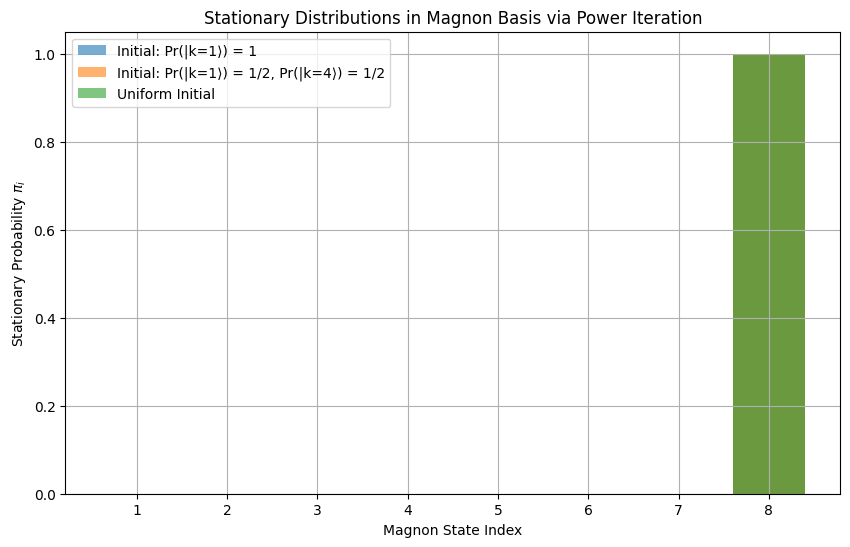

Transition Rate Matrix Q:
[[-0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. -0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
Stationary Distribution for Initial: Pr(|k=1⟩) = 1:
[0. 0. 0. 0. 0. 0. 0. 1.]
Stationary Distribution for Initial: Pr(|k=1⟩) = 1/2, Pr(|k=4⟩) = 1/2:
[0. 0. 0. 0. 0. 0. 0. 1.]
Stationary Distribution for Uniform Initial:
[0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
#task3p7 


import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh, expm


Sx = np.array([[0, 1], [1, 0]]) / 2
Sy = np.array([[0, -1j], [1j, 0]]) / 2
Sz = np.array([[1, 0], [0, -1]]) / 2
I = np.eye(2)


def kron3(A, B, C):
    return np.kron(np.kron(A, B), C)

Sx1 = kron3(Sx, I, I)
Sx2 = kron3(I, Sx, I)
Sx3 = kron3(I, I, Sx)

Sy1 = kron3(Sy, I, I)
Sy2 = kron3(I, Sy, I)
Sy3 = kron3(I, I, Sy)

Sz1 = kron3(Sz, I, I)
Sz2 = kron3(I, Sz, I)
Sz3 = kron3(I, I, Sz)


J = 1.0
H = (4 - J * (
    0.5 * (Sx1 @ Sx2 + Sy1 @ Sy2) + Sz1 @ Sz2 +
    0.5 * (Sx2 @ Sx3 + Sy2 @ Sy3) + Sz2 @ Sz3 +
    0.5 * (Sx3 @ Sx1 + Sy3 @ Sy1) + Sz3 @ Sz1
))


eigenvalues, eigenvectors = eigh(H)


kB = 1.0  
T = 1.0  

def boltzmann_transition_matrix(energies, T):
    P = np.exp(-np.subtract.outer(energies, energies) / (kB * T))
    P /= P.sum(axis=1, keepdims=True)  # Normalize rows
    return P

P_magnon = boltzmann_transition_matrix(eigenvalues, T)


def transition_rate_matrix(P):
    Q = P - np.eye(P.shape[0])
    np.fill_diagonal(Q, -np.sum(Q, axis=1))
    return Q

Q_magnon = transition_rate_matrix(P_magnon)


def power_iteration(P, pi0, tol=1e-6, max_iter=1000):
    pi = pi0
    for _ in range(max_iter):
        pi_next = pi @ P
        if np.linalg.norm(pi_next - pi) < tol:
            break
        pi = pi_next
    return pi


pi_initials = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),  
    np.array([0.5, 0, 0, 0.5, 0, 0, 0, 0]),  
    np.ones(8) / 8  
]


stationary_distributions = [power_iteration(P_magnon, pi0) for pi0 in pi_initials]

plt.figure(figsize=(10, 6))
labels = ["Initial: Pr(|k=1⟩) = 1", "Initial: Pr(|k=1⟩) = 1/2, Pr(|k=4⟩) = 1/2", "Uniform Initial"]
for i, pi in enumerate(stationary_distributions):
    plt.bar(range(1, 9), pi, alpha=0.6, label=labels[i])

plt.xlabel("Magnon State Index")
plt.ylabel("Stationary Probability $\pi_i$")
plt.title("Stationary Distributions in Magnon Basis via Power Iteration")
plt.legend()
plt.grid()
plt.savefig("power_iteration_stationary_distribution_magnon.png", dpi=300, bbox_inches='tight')
plt.show()


print("Transition Rate Matrix Q:")
print(Q_magnon)


np.set_printoptions(precision=3, suppress=True)
for i, pi in enumerate(stationary_distributions):
    print(f"Stationary Distribution for {labels[i]}:")
    print(pi)
